# Import/install libraries

In [1]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
pd.options.display.max_colwidth = 1000

# Load data

In [3]:
data_root = os.path.join("/workspace/academy/assignment1", "data")

In [4]:
df_train = pd.read_parquet(os.path.join(data_root, "train.parquet"))

In [5]:
df_test = pd.read_parquet(os.path.join(data_root, "test.parquet"))

In [6]:
df_example = pd.read_parquet(os.path.join(data_root, "example_predictions.parquet"))

# EDA

## Looking at loaded data

In [7]:
pd.options.display.max_colwidth = 1000

In [8]:
df_train.shape

(3861, 8)

In [9]:
df_test.shape

(946, 4)

In [10]:
df_example.shape

(5, 8)

In [11]:
df_train.head()

,uuid,description,color,price,cc3,sparkling,floral,striped
0,00_06db4_f7PKCScjE7iz9RccgKoYU8BG,beautiful summer dress by zara only worn once.\n\n#zara #zarawoman #zaradress #summerdress #dress,VARIOUS,8.40,DRESSES,False,True,False
1,00_074fe_d1wi5P39YxXsM3aYJWdToH2p,Maroon denim colored high rise jean shorts from Charlotte Russe size 2. Fits sizes 25-26 and goes up to right under belly button on a 5”7 tall person. Shorts are in good condition but there is slight wear as pictured in the back,BROWN,3.80,SHORTS_CAPRIS,False,False,False
2,0746f_viq17Xw4gBvYbmB1qKD5z6Z8,brand-new without tags x,VARIOUS,7.20,SHORTS_CAPRIS,False,True,False
3,00_069a4_PN8t6dcbp8PopRPnsBTp2MWv,"Vasariška trumpa lengva medvilninė suknytė, be defektų.\nIlgis 83cm, plotis tarp pažastų 37cm.\n#terranova #suknele #geleta",VARIOUS,2.00,DRESSES,False,True,False
4,00_05337_c3Lr3d3VjSyg6SXZALzZXkpd,"size small, worn; distressed look. one has a pain stain, see pics \nWILL THROW IN FREE W ANY BUNDLE IF ASKED \n#jsfcloset",RED,0.76,SHORTS_CAPRIS,False,False,False


In [12]:
df_test.head()

,uuid,description,color,price
0,00_04fec_bcBubyJW2q8o6JPFntUn4Q9W,"In great condition! No holes, stains or pilling. \n\nSize 26. \n\nStyle is Skinny Toothpick. \n\nMade of 99% cotton, 1% spandex. \n\nSmoke free home. All sales are final.\n\n#jcrew\n#corduroy\n#skinnyjeans",GREY,11.400
1,00_050a7_o9o8NLTcXJ7Hqs2t31xEGoG4,"šiek tiek praires užtrauktukas ,reiktų šiek tiek\nsuimt su siūlu . ne auksteniai nei 170cm \nPrašau neprašykite išmatavimų nuo pažasties iki klyno ir pan. Visi dydžiai yra standartiniai ,jei neparašyta kitaip. Nemainau.",WHITE,5.000
2,00_060f0_zLp2b8moCnfWX614ZAu8HfsS,This square neckline dress is so beautiful! It’s sheer and printed. It’s a pretty turquoise blue color. The back ties. It’s asymmetrical and ruched at one side. The brand is Cabi. Size small.,BLUE,26.600
3,00_05d49_74iqVSd8yami4Szoy5tBjkGF,"Maxi sukně ze zajímavého materiálu, tak trošku mění barvu na světle. Vysoký pas. Super objem, skoro princeznovská:)\n\n#dlouhasukne #maxisukne #sukne #zajímavý #zajímavá #zajimavabarva #material #lesklý #lesklá #extravagantni",PINK,4.668
4,00_06301_twfaovSeAmiJoFPWgAE9b99G,"Labai graži suknelė, yra maža dėmelė,kuri tikrak išsiplaus",BLACK,5.000


In [13]:
df_example.head()

,uuid,description,color,price,cc3,sparkling,floral,striped
0,00_06db4_f7PKCScjE7iz9RccgKoYU8BG,beautiful summer dress by zara only worn once.\n\n#zara #zarawoman #zaradress #summerdress #dress,VARIOUS,8.40,DRESSES,False,True,False
1,00_074fe_d1wi5P39YxXsM3aYJWdToH2p,Maroon denim colored high rise jean shorts from Charlotte Russe size 2. Fits sizes 25-26 and goes up to right under belly button on a 5”7 tall person. Shorts are in good condition but there is slight wear as pictured in the back,BROWN,3.80,SHORTS_CAPRIS,False,False,False
2,0746f_viq17Xw4gBvYbmB1qKD5z6Z8,brand-new without tags x,VARIOUS,7.20,SHORTS_CAPRIS,False,True,False
3,00_069a4_PN8t6dcbp8PopRPnsBTp2MWv,"Vasariška trumpa lengva medvilninė suknytė, be defektų.\nIlgis 83cm, plotis tarp pažastų 37cm.\n#terranova #suknele #geleta",VARIOUS,2.00,DRESSES,False,True,False
4,00_05337_c3Lr3d3VjSyg6SXZALzZXkpd,"size small, worn; distressed look. one has a pain stain, see pics \nWILL THROW IN FREE W ANY BUNDLE IF ASKED \n#jsfcloset",RED,0.76,SHORTS_CAPRIS,False,False,False


## Training df

### All df in general

#### Duplicate rows

In [14]:
df_train.duplicated().sum()

66

In [15]:
df_train[df_train.duplicated(keep=False).values].set_index("uuid").sort_index().head(4)

,description,color,price,cc3,sparkling,floral,striped
uuid,,,,,,,
00_04e32_uA8Gveq8Cr43y9A8p6FNWjeR,">> až 15% sleva na sety <<\n\nProužkované lesklé šatky s háčkovaným horním okrajem a ramínky, mají spodničku, dobře vypadají s nějakým páskem. Materiál 95% viskoza, 5% kovová vlákna, podšívka polyester.\nVelikost S odpovídá. Délka 114 cm.\n\n>> více info v profilu <<\n\n#boho #hippie #mididress # #shimmer #crochet #mustard #spring #summer #autumn #viscose #zara",RED,11.6700,DRESSES,True,False,True
00_04e32_uA8Gveq8Cr43y9A8p6FNWjeR,">> až 15% sleva na sety <<\n\nProužkované lesklé šatky s háčkovaným horním okrajem a ramínky, mají spodničku, dobře vypadají s nějakým páskem. Materiál 95% viskoza, 5% kovová vlákna, podšívka polyester.\nVelikost S odpovídá. Délka 114 cm.\n\n>> více info v profilu <<\n\n#boho #hippie #mididress # #shimmer #crochet #mustard #spring #summer #autumn #viscose #zara",RED,11.6700,DRESSES,True,False,True
00_04ef6_pn2b1ydpsrw2TQLriG1uLm5q,nové:) Da se použit i jako Tunika :) \n,BLUE,15.5211,DRESSES,False,False,True
00_04ef6_pn2b1ydpsrw2TQLriG1uLm5q,nové:) Da se použit i jako Tunika :) \n,BLUE,15.5211,DRESSES,False,False,True


#### Delete dublication

In [16]:
df_train = df_train[~df_train.duplicated()]

#### Info

In [17]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3795 entries, 0 to 3277
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   uuid         3795 non-null   object 
 1   description  3795 non-null   object 
 2   color        3795 non-null   object 
 3   price        3795 non-null   float64
 4   cc3          3422 non-null   object 
 5   sparkling    3795 non-null   bool   
 6   floral       3795 non-null   bool   
 7   striped      3795 non-null   bool   
dtypes: bool(3), float64(1), object(4)
memory usage: 189.0+ KB


In [18]:
df_train.isna().sum()

uuid             0
description      0
color            0
price            0
cc3            373
sparkling        0
floral           0
striped          0
dtype: int64

### Column "uuid"

#### This colum should be unique in all data column

In [19]:
df_train["uuid"].value_counts().ge(2).sum()

10

#### Have 10 dublicated rows, lets look how they look, becouse they weren't deleted as full row dublicates

In [20]:
dt_train_only_same_uuid = df_train[df_train.duplicated(subset=["uuid"], keep=False)].sort_values(by="uuid")
dt_train_only_same_uuid

,uuid,description,color,price,cc3,sparkling,floral,striped
3007,00_04eaf_TVbYdLiveQeR7NruNvDBNF2Z,"prsa 38cm, délka 55cm, pružný",BROWN,3.89,None,False,False,True
3007,00_04eaf_TVbYdLiveQeR7NruNvDBNF2Z,"prsa 38cm, délka 55cm, pružný",BROWN,3.89,PULLOVERS_SWEATERS,False,False,True
1222,00_05414_gxmt8KnGmNoc2ngfV8goMSwf,- only worn a few times\n- destress at leg holes \n- some distress rips\nAny questions? Just contact me!,LIGHT-BLUE,5.32,SHORTS_CAPRIS,False,False,False
1222,00_05414_gxmt8KnGmNoc2ngfV8goMSwf,- only worn a few times\n- destress at leg holes \n- some distress rips\nAny questions? Just contact me!,LIGHT-BLUE,5.32,None,False,False,False
3277,00_0544f_pzMGTc8daECPZinQkkB1EP6w,"Never worn, A-line tie waist dress. Tags not attached.",BODY,7.60,None,False,True,False
3277,00_0544f_pzMGTc8daECPZinQkkB1EP6w,"Never worn, A-line tie waist dress. Tags not attached.",BODY,7.60,DRESSES,False,True,False
1719,00_05b4e_usebeyzYnoyRwH4MbvarXGyd,"Uzsideta viena karta per naujuju metu svente. Labai tampri medziaga rausva su blizgeliu. Tarp pazastu laisvumo busenoje 100 cm ir tempiasi gal iki 140 cm, ilgis nuo peties iki apacios 85 cm. Medziagele persisviecia, bet maloni prie kuno. Jei reikia galiu siusti per pastomata.",ROSE,8.00,None,True,False,False
1719,00_05b4e_usebeyzYnoyRwH4MbvarXGyd,"Uzsideta viena karta per naujuju metu svente. Labai tampri medziaga rausva su blizgeliu. Tarp pazastu laisvumo busenoje 100 cm ir tempiasi gal iki 140 cm, ilgis nuo peties iki apacios 85 cm. Medziagele persisviecia, bet maloni prie kuno. Jei reikia galiu siusti per pastomata.",ROSE,8.00,DRESSES,True,False,False
3769,00_05cb8_CUufbE6EiSvET1F9aQq51Rbo,Great condition\nSize medium\nZippers on side,BLACK,11.40,None,False,False,True
3769,00_05cb8_CUufbE6EiSvET1F9aQq51Rbo,Great condition\nSize medium\nZippers on side,BLACK,11.40,DRESSES,False,False,True


#### It looks that only thing that different theme from being completely duplicate is "cc3" column with None values

In [21]:
df_train_no_cc3_duplic = df_train[df_train.loc[:, df_train.columns != "cc3"].duplicated(keep=False)].sort_values(by="uuid")
df_train_no_cc3_duplic

,uuid,description,color,price,cc3,sparkling,floral,striped
3007,00_04eaf_TVbYdLiveQeR7NruNvDBNF2Z,"prsa 38cm, délka 55cm, pružný",BROWN,3.89,None,False,False,True
3007,00_04eaf_TVbYdLiveQeR7NruNvDBNF2Z,"prsa 38cm, délka 55cm, pružný",BROWN,3.89,PULLOVERS_SWEATERS,False,False,True
1222,00_05414_gxmt8KnGmNoc2ngfV8goMSwf,- only worn a few times\n- destress at leg holes \n- some distress rips\nAny questions? Just contact me!,LIGHT-BLUE,5.32,SHORTS_CAPRIS,False,False,False
1222,00_05414_gxmt8KnGmNoc2ngfV8goMSwf,- only worn a few times\n- destress at leg holes \n- some distress rips\nAny questions? Just contact me!,LIGHT-BLUE,5.32,None,False,False,False
3277,00_0544f_pzMGTc8daECPZinQkkB1EP6w,"Never worn, A-line tie waist dress. Tags not attached.",BODY,7.60,None,False,True,False
3277,00_0544f_pzMGTc8daECPZinQkkB1EP6w,"Never worn, A-line tie waist dress. Tags not attached.",BODY,7.60,DRESSES,False,True,False
1719,00_05b4e_usebeyzYnoyRwH4MbvarXGyd,"Uzsideta viena karta per naujuju metu svente. Labai tampri medziaga rausva su blizgeliu. Tarp pazastu laisvumo busenoje 100 cm ir tempiasi gal iki 140 cm, ilgis nuo peties iki apacios 85 cm. Medziagele persisviecia, bet maloni prie kuno. Jei reikia galiu siusti per pastomata.",ROSE,8.00,None,True,False,False
1719,00_05b4e_usebeyzYnoyRwH4MbvarXGyd,"Uzsideta viena karta per naujuju metu svente. Labai tampri medziaga rausva su blizgeliu. Tarp pazastu laisvumo busenoje 100 cm ir tempiasi gal iki 140 cm, ilgis nuo peties iki apacios 85 cm. Medziagele persisviecia, bet maloni prie kuno. Jei reikia galiu siusti per pastomata.",ROSE,8.00,DRESSES,True,False,False
3769,00_05cb8_CUufbE6EiSvET1F9aQq51Rbo,Great condition\nSize medium\nZippers on side,BLACK,11.40,None,False,False,True
3769,00_05cb8_CUufbE6EiSvET1F9aQq51Rbo,Great condition\nSize medium\nZippers on side,BLACK,11.40,DRESSES,False,False,True


#### It looks the same, lets check it 

In [22]:
dt_train_only_same_uuid.equals(df_train_no_cc3_duplic)

True

#### Remove from df_train rows with duplicated "uuid" and "cc3" == None

In [23]:
duplic_index = list(df_train_no_cc3_duplic[df_train_no_cc3_duplic["cc3"].isna()].index)

In [24]:
df_train.drop(duplic_index, inplace=True)

#### Look again in "uuid" duplicates

In [25]:
df_train["uuid"].value_counts().ge(2).sum()

0

### If all "uuid" from df_train are in "photos" folder

#### Create df of photos names

In [26]:
images_names = pd.DataFrame({"uuid" : list(os.listdir(os.path.join(data_root, "photos")))})

In [27]:
images_names.head()

,uuid
0,00_04e25_8szf1Q1etszF4tRDvXwuh8e5.jpeg
1,00_04e26_DF4FKTRubmxnUj7LTi2aWqz5.jpeg
2,00_04e27_Fg7gWJD7D3djQAsU2XsZb1F2.jpeg
3,00_04e27_rYvQm4SdjRZwxgvWezRtmBqK.jpeg
4,00_04e2a_JdxtpYpFmHNLrieuPSBqEqnM.jpeg


#### Look if all image formats are the same

In [28]:
images_names["format"] = images_names["uuid"].str.findall(r"(?<=\.).*")

In [29]:
images_names.head()

,uuid,format
0,00_04e25_8szf1Q1etszF4tRDvXwuh8e5.jpeg,[jpeg]
1,00_04e26_DF4FKTRubmxnUj7LTi2aWqz5.jpeg,[jpeg]
2,00_04e27_Fg7gWJD7D3djQAsU2XsZb1F2.jpeg,[jpeg]
3,00_04e27_rYvQm4SdjRZwxgvWezRtmBqK.jpeg,[jpeg]
4,00_04e2a_JdxtpYpFmHNLrieuPSBqEqnM.jpeg,[jpeg]


In [30]:
images_names["format"].explode().unique()

array(['jpeg'], dtype=object)

#### Remove format from "uuid"

In [31]:
images_names["uuid"] = images_names["uuid"].str.replace(r"\..*", "")
images_names.head()

,uuid,format
0,00_04e25_8szf1Q1etszF4tRDvXwuh8e5,[jpeg]
1,00_04e26_DF4FKTRubmxnUj7LTi2aWqz5,[jpeg]
2,00_04e27_Fg7gWJD7D3djQAsU2XsZb1F2,[jpeg]
3,00_04e27_rYvQm4SdjRZwxgvWezRtmBqK,[jpeg]
4,00_04e2a_JdxtpYpFmHNLrieuPSBqEqnM,[jpeg]


#### Check if all df_train "uuid" elements are in "photos" folder

In [32]:
df_train["uuid"].isin(images_names["uuid"]).value_counts()

True    3775
Name: uuid, dtype: int64

### Column "cc3"

In [33]:
df_train_cc3 = df_train["cc3"].value_counts(normalize=True, dropna=False).reset_index()
df_train_cc3["index"].fillna("MISSING", inplace=True)
df_train_cc3

,index,cc3
0,DRESSES,0.440795
1,TROUSERS,0.135629
2,SHORTS_CAPRIS,0.125563
3,SKIRTS,0.116821
4,MISSING,0.096159
5,PULLOVERS_SWEATERS,0.085033


Text(0, 0.5, 'Category of the item')

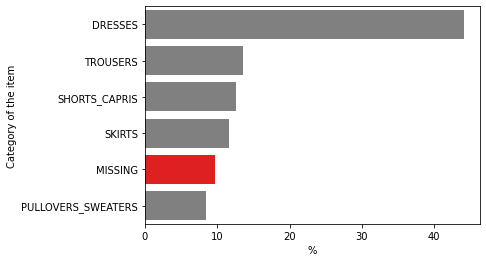

In [34]:
clrs = ["grey" if col_name != "MISSING" else "red" for col_name in df_train_cc3["index"].values]

sns.barplot(y=df_train_cc3["index"], x=df_train_cc3["cc3"] * 100, palette=clrs)
plt.xlabel("%")
plt.ylabel("Category of the item")

#### Have a lot Missing data, almost the same amount as majority of other categories (exept DRESSES)
For this time we delete all missing values

In [35]:
df_train.dropna(subset=["cc3"], inplace=True)

### Column "sparkling", "floral" and "striped"

#### Looking for NaN values

In [36]:
df_train["sparkling"].value_counts(dropna=False)

False    3045
True      367
Name: sparkling, dtype: int64

In [37]:
df_train["floral"].value_counts(dropna=False)

False    2194
True     1218
Name: floral, dtype: int64

In [38]:
df_train["striped"].value_counts(dropna=False)

False    2612
True      800
Name: striped, dtype: int64

### Column "price"

In [39]:
df_train["price"].describe()

count    3412.000000
mean       10.907439
std        14.684314
min         0.038900
25%         4.800000
50%         7.600000
75%        12.000000
max       592.800000
Name: price, dtype: float64

In [40]:
df_train["price"].isna().sum()

0

### Price distribustion

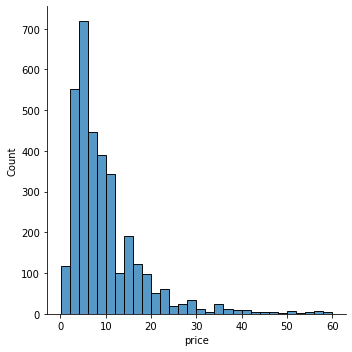

In [41]:
sns.displot( df_train.query("price < 60")['price'] , bins=30)

### Price distribution by category with BoxPlots

Text(0.5, 0, '')

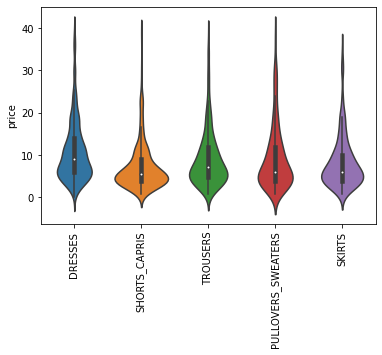

In [42]:
ax = sns.violinplot(x='cc3', y="price", data=df_train.query("price < 40"))
plt.xticks(rotation=90)
ax.set_xlabel('')

#### Color distribution

In [43]:
color_dist = pd.DataFrame()
color_dist['color'] = df_train['color'].value_counts().index
color_dist['count'] = df_train['color'].value_counts().values

Text(0, 0.5, 'Colors')

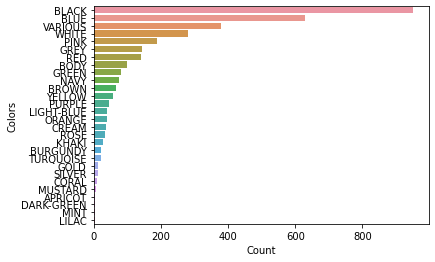

In [44]:
sns.barplot(y=color_dist['color'], x=color_dist['count'])
sns.set(rc={'figure.figsize':(10,10)})
sns.set_theme(style="whitegrid")
plt.xlabel("Count")
plt.ylabel("Colors")

# Demo feature engeneering

In [45]:
# df_train["description2"] = df_train["description"].str.replace(r"\W|\d", " ").str.lower().str.split()

In [46]:
df_train["description2"] = df_train["description"].str.replace(r"\W", " ").str.lower().str.split()

In [47]:
df_train[["description" ,"description2"]].head(50)

,description,description2
0,beautiful summer dress by zara only worn once.\n\n#zara #zarawoman #zaradress #summerdress #dress,"[beautiful, summer, dress, by, zara, only, worn, once, zara, zarawoman, zaradress, summerdress, dress]"
1,Maroon denim colored high rise jean shorts from Charlotte Russe size 2. Fits sizes 25-26 and goes up to right under belly button on a 5”7 tall person. Shorts are in good condition but there is slight wear as pictured in the back,"[maroon, denim, colored, high, rise, jean, shorts, from, charlotte, russe, size, 2, fits, sizes, 25, 26, and, goes, up, to, right, under, belly, button, on, a, 5, 7, tall, person, shorts, are, in, good, condition, but, there, is, slight, wear, as, pictured, in, the, back]"
2,brand-new without tags x,"[brand, new, without, tags, x]"
3,"Vasariška trumpa lengva medvilninė suknytė, be defektų.\nIlgis 83cm, plotis tarp pažastų 37cm.\n#terranova #suknele #geleta","[vasariška, trumpa, lengva, medvilninė, suknytė, be, defektų, ilgis, 83cm, plotis, tarp, pažastų, 37cm, terranova, suknele, geleta]"
4,"size small, worn; distressed look. one has a pain stain, see pics \nWILL THROW IN FREE W ANY BUNDLE IF ASKED \n#jsfcloset","[size, small, worn, distressed, look, one, has, a, pain, stain, see, pics, will, throw, in, free, w, any, bundle, if, asked, jsfcloset]"
5,"Lengva ir žaisminga vasarinė Zara suknelė. Nešiota, tačiau geros būklės. Dydis labiau M.\n\nPlius siuntimo išlaidos.","[lengva, ir, žaisminga, vasarinė, zara, suknelė, nešiota, tačiau, geros, būklės, dydis, labiau, m, plius, siuntimo, išlaidos]"
6,banned tartan skinny jeans \n\nsize 14 ladies \n\nnot worn as don’t fit me!! \n\ncan post via Royal Mail second class singed for £4 \n\npayment via PayPal only please,"[banned, tartan, skinny, jeans, size, 14, ladies, not, worn, as, don, t, fit, me, can, post, via, royal, mail, second, class, singed, for, 4, payment, via, paypal, only, please]"
7,"This dress is super comfortable, it's bodycon and midi. I've used it a few times but it's in really good condition, it's perfect for spring/autumn because it's warm but not too much!\n\nThe white stripes have slightly golden shimmer on them :)","[this, dress, is, super, comfortable, it, s, bodycon, and, midi, i, ve, used, it, a, few, times, but, it, s, in, really, good, condition, it, s, perfect, for, spring, autumn, because, it, s, warm, but, not, too, much, the, white, stripes, have, slightly, golden, shimmer, on, them]"
8,"nové, neunosila jsem","[nové, neunosila, jsem]"
9,very good condition,"[very, good, condition]"


In [48]:
!pip install nltk

In [49]:
import nltk
from nltk.corpus import stopwords

In [50]:
# nltk.download('stopwords')

In [51]:
print(stopwords.fileids())

['arabic', 'azerbaijani', 'danish', 'dutch', 'english', 'finnish', 'french', 'german', 'greek', 'hungarian', 'indonesian', 'italian', 'kazakh', 'nepali', 'norwegian', 'portuguese', 'romanian', 'russian', 'slovene', 'spanish', 'swedish', 'tajik', 'turkish']


In [52]:
print(stopwords.words('french'))

['au', 'aux', 'avec', 'ce', 'ces', 'dans', 'de', 'des', 'du', 'elle', 'en', 'et', 'eux', 'il', 'ils', 'je', 'la', 'le', 'les', 'leur', 'lui', 'ma', 'mais', 'me', 'même', 'mes', 'moi', 'mon', 'ne', 'nos', 'notre', 'nous', 'on', 'ou', 'par', 'pas', 'pour', 'qu', 'que', 'qui', 'sa', 'se', 'ses', 'son', 'sur', 'ta', 'te', 'tes', 'toi', 'ton', 'tu', 'un', 'une', 'vos', 'votre', 'vous', 'c', 'd', 'j', 'l', 'à', 'm', 'n', 's', 't', 'y', 'été', 'étée', 'étées', 'étés', 'étant', 'étante', 'étants', 'étantes', 'suis', 'es', 'est', 'sommes', 'êtes', 'sont', 'serai', 'seras', 'sera', 'serons', 'serez', 'seront', 'serais', 'serait', 'serions', 'seriez', 'seraient', 'étais', 'était', 'étions', 'étiez', 'étaient', 'fus', 'fut', 'fûmes', 'fûtes', 'furent', 'sois', 'soit', 'soyons', 'soyez', 'soient', 'fusse', 'fusses', 'fût', 'fussions', 'fussiez', 'fussent', 'ayant', 'ayante', 'ayantes', 'ayants', 'eu', 'eue', 'eues', 'eus', 'ai', 'as', 'avons', 'avez', 'ont', 'aurai', 'auras', 'aura', 'aurons', 'aur

In [53]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [54]:
list_of_stop_words =[]
for language in stopwords.fileids():
       list_of_stop_words += stopwords.words(language)

delete stop words

In [55]:
df_train['description3'] = df_train['description2'].apply(lambda x: [item for item in x if item not in list_of_stop_words])


Joining list back to text

In [56]:
df_train['description4'] = df_train['description3'].apply(lambda x: " ".join(x))


In [57]:
df_train[["description3" ,"description4"]].head(50)

,description3,description4
0,"[beautiful, summer, dress, zara, worn, zara, zarawoman, zaradress, summerdress, dress]",beautiful summer dress zara worn zara zarawoman zaradress summerdress dress
1,"[maroon, denim, colored, high, rise, jean, shorts, charlotte, russe, size, 2, fits, sizes, 25, 26, goes, right, belly, button, 5, 7, tall, person, shorts, good, condition, slight, wear, pictured, back]",maroon denim colored high rise jean shorts charlotte russe size 2 fits sizes 25 26 goes right belly button 5 7 tall person shorts good condition slight wear pictured back
2,"[brand, new, without, tags, x]",brand new without tags x
3,"[vasariška, trumpa, lengva, medvilninė, suknytė, defektų, ilgis, 83cm, plotis, tarp, pažastų, 37cm, terranova, suknele, geleta]",vasariška trumpa lengva medvilninė suknytė defektų ilgis 83cm plotis tarp pažastų 37cm terranova suknele geleta
4,"[size, small, worn, distressed, look, pain, stain, see, pics, throw, free, w, bundle, asked, jsfcloset]",size small worn distressed look pain stain see pics throw free w bundle asked jsfcloset
5,"[lengva, ir, žaisminga, vasarinė, zara, suknelė, nešiota, tačiau, geros, būklės, dydis, labiau, plius, siuntimo, išlaidos]",lengva ir žaisminga vasarinė zara suknelė nešiota tačiau geros būklės dydis labiau plius siuntimo išlaidos
6,"[banned, tartan, skinny, jeans, size, 14, ladies, worn, fit, post, via, royal, mail, second, class, singed, 4, payment, via, paypal, please]",banned tartan skinny jeans size 14 ladies worn fit post via royal mail second class singed 4 payment via paypal please
7,"[dress, super, comfortable, bodycon, midi, used, times, really, good, condition, perfect, spring, autumn, warm, much, white, stripes, slightly, golden, shimmer]",dress super comfortable bodycon midi used times really good condition perfect spring autumn warm much white stripes slightly golden shimmer
8,"[nové, neunosila, jsem]",nové neunosila jsem
9,"[good, condition]",good condition


In [58]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

le.fit(df_train["cc3"])

LabelEncoder()

In [59]:
df_train.head(2)

,uuid,description,color,price,cc3,sparkling,floral,striped,description2,description3,description4
0,00_06db4_f7PKCScjE7iz9RccgKoYU8BG,beautiful summer dress by zara only worn once.\n\n#zara #zarawoman #zaradress #summerdress #dress,VARIOUS,8.4,DRESSES,False,True,False,"[beautiful, summer, dress, by, zara, only, worn, once, zara, zarawoman, zaradress, summerdress, dress]","[beautiful, summer, dress, zara, worn, zara, zarawoman, zaradress, summerdress, dress]",beautiful summer dress zara worn zara zarawoman zaradress summerdress dress
1,00_074fe_d1wi5P39YxXsM3aYJWdToH2p,Maroon denim colored high rise jean shorts from Charlotte Russe size 2. Fits sizes 25-26 and goes up to right under belly button on a 5”7 tall person. Shorts are in good condition but there is slight wear as pictured in the back,BROWN,3.8,SHORTS_CAPRIS,False,False,False,"[maroon, denim, colored, high, rise, jean, shorts, from, charlotte, russe, size, 2, fits, sizes, 25, 26, and, goes, up, to, right, under, belly, button, on, a, 5, 7, tall, person, shorts, are, in, good, condition, but, there, is, slight, wear, as, pictured, in, the, back]","[maroon, denim, colored, high, rise, jean, shorts, charlotte, russe, size, 2, fits, sizes, 25, 26, goes, right, belly, button, 5, 7, tall, person, shorts, good, condition, slight, wear, pictured, back]",maroon denim colored high rise jean shorts charlotte russe size 2 fits sizes 25 26 goes right belly button 5 7 tall person shorts good condition slight wear pictured back


In [60]:
le.classes_

array(['DRESSES', 'PULLOVERS_SWEATERS', 'SHORTS_CAPRIS', 'SKIRTS',
       'TROUSERS'], dtype=object)

In [61]:
df_train['cc3_encoded'] = le.transform(df_train['cc3'])


In [62]:
df_train.head(2)

,uuid,description,color,price,cc3,sparkling,floral,striped,description2,description3,description4,cc3_encoded
0,00_06db4_f7PKCScjE7iz9RccgKoYU8BG,beautiful summer dress by zara only worn once.\n\n#zara #zarawoman #zaradress #summerdress #dress,VARIOUS,8.4,DRESSES,False,True,False,"[beautiful, summer, dress, by, zara, only, worn, once, zara, zarawoman, zaradress, summerdress, dress]","[beautiful, summer, dress, zara, worn, zara, zarawoman, zaradress, summerdress, dress]",beautiful summer dress zara worn zara zarawoman zaradress summerdress dress,0
1,00_074fe_d1wi5P39YxXsM3aYJWdToH2p,Maroon denim colored high rise jean shorts from Charlotte Russe size 2. Fits sizes 25-26 and goes up to right under belly button on a 5”7 tall person. Shorts are in good condition but there is slight wear as pictured in the back,BROWN,3.8,SHORTS_CAPRIS,False,False,False,"[maroon, denim, colored, high, rise, jean, shorts, from, charlotte, russe, size, 2, fits, sizes, 25, 26, and, goes, up, to, right, under, belly, button, on, a, 5, 7, tall, person, shorts, are, in, good, condition, but, there, is, slight, wear, as, pictured, in, the, back]","[maroon, denim, colored, high, rise, jean, shorts, charlotte, russe, size, 2, fits, sizes, 25, 26, goes, right, belly, button, 5, 7, tall, person, shorts, good, condition, slight, wear, pictured, back]",maroon denim colored high rise jean shorts charlotte russe size 2 fits sizes 25 26 goes right belly button 5 7 tall person shorts good condition slight wear pictured back,2


In [188]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfTransformer

from sklearn.pipeline import Pipeline
text_clf = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
#     ('clf', MultinomialNB()),
#     ('clf', SGDClassifier(loss='hinge', penalty='l2',
#         alpha=1e-3, random_state=42,
#         max_iter=10000, tol=None)),
    ('clf', LogisticRegression()),

    ])

In [189]:
from sklearn.model_selection import train_test_split

df_train_set, df_val_set = train_test_split(df_train, test_size = 0.2)

In [190]:
text_clf.fit(df_train_set["description4"], df_train_set["cc3_encoded"])

Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf', LogisticRegression())])

In [191]:
import numpy as np

In [192]:
predicted = text_clf.predict(df_val_set["description4"])
np.mean(predicted == df_val_set["cc3_encoded"])

0.7086383601756955

In [182]:
predicted



array([0, 0, 0, 0, 0, 3, 4, 0, 0, 0, 0, 0, 2, 3, 0, 4, 0, 0, 3, 3, 0, 3,
       3, 0, 1, 0, 1, 0, 0, 0, 2, 1, 0, 1, 0, 1, 0, 0, 0, 2, 0, 0, 2, 0,
       0, 1, 0, 3, 0, 4, 0, 0, 0, 4, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0,
       4, 0, 0, 0, 0, 3, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 3, 0, 0, 0, 4, 4, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 1, 4, 0, 2, 0, 0, 4,
       4, 0, 0, 0, 0, 0, 3, 2, 2, 4, 0, 0, 4, 0, 0, 0, 0, 0, 2, 0, 2, 2,
       4, 0, 0, 3, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 4, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 3, 0, 1, 0, 4, 0, 0, 0, 3, 4, 0,
       0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 1, 0, 0, 3, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 4, 0, 0,
       0, 0, 0, 0, 1, 0, 2, 0, 2, 0, 4, 0, 0, 0, 0, 3, 0, 0, 1, 0, 0, 0,
       0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 4, 0, 4,
       0, 0, 0, 0, 0, 3, 2, 0, 0, 0, 0, 3, 1, 0, 0,

In [89]:
df_val_set["predicted_lables"] = pd.Series(predicted).values

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [90]:
df_val_set[["cc3","cc3_encoded", "predicted_lables"]].head()

,cc3,cc3_encoded,predicted_lables
62,SHORTS_CAPRIS,2,0
1456,TROUSERS,4,0
1169,TROUSERS,4,0
1504,DRESSES,0,0
3507,DRESSES,0,0


In [91]:
from sklearn.metrics import confusion_matrix
confusion_matrix(le.classes_[df_val_set["cc3_encoded"]], le.classes_[df_val_set["predicted_lables"]], labels=le.classes_)

array([[307,   1,   4,   2,   4],
       [ 27,  38,   0,   0,   3],
       [ 32,   0,  69,   1,   5],
       [ 31,   1,   5,  47,   3],
       [ 44,   0,   7,   0,  52]])

In [92]:
from sklearn.metrics import plot_confusion_matrix

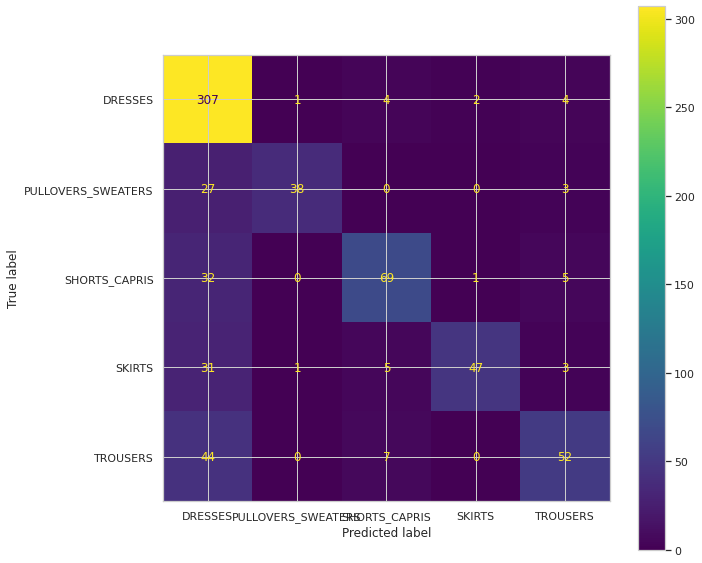

In [93]:
plot_confusion_matrix(text_clf, df_val_set["description4"], df_val_set["cc3_encoded"], display_labels=le.classes_)